In [100]:
# Creating a radar chart for Kwame Poku
import pandas as pd
import numpy as np
from scipy import stats
import math
from mplsoccer import PyPizza, add_image, FontManager
import matplotlib.pyplot as plt

league_one = pd.read_csv("league_one.csv") 

In [102]:
league_one['Position'] = league_one['Position'].str.strip().str.upper()

# Filter rows where 'RW' or 'RAMF' are distinct positions
league_one_rw = league_one[
    league_one['Position'].apply(lambda pos: any(role in ['RW', 'RAMF'] for role in pos.split(', ')))
]

# Define Parameters
params = [
    'Player', 'Team', 'xG per 90', 'Assists per 90', 'xA per 90', 'Successful attacking actions per 90',
    'Goals per 90', 'Smart passes per 90', 'Key passes per 90', 'Passes per 90',
    'Accurate passes, %', 'Crosses per 90', 'Accurate crosses, %', 'Dribbles per 90',
    'Successful dribbles, %', 'Progressive runs per 90', 'Accelerations per 90',
    'Fouls suffered per 90', 'Defensive duels per 90', 'Aerial duels per 90', 'Defensive duels won, %', 
    'Aerial duels won, %', 'PAdj Interceptions', 'Successful defensive actions per 90'
]
 
league_one_rw_filtered = league_one_rw[params]
params = params[2:]
league_one_rw

,Player,Team,Team within selected timeframe,Position,Age,Market value,Contract expires,Matches played,Minutes played,Goals,...,Prevented goals per 90,Back passes received as GK per 90,Exits per 90,Aerial duels per 90.1,Free kicks per 90,Direct free kicks per 90,"Direct free kicks on target, %",Corners per 90,Penalties taken,"Penalty conversion, %"
2,W. Willumsson,Birmingham City,Birmingham City,"AMF, RAMF",26.0,3000000,30/06/2028,15,1267,4,...,NaN,0.21,NaN,NaN,0.21,0.21,33.33,0.00,0,0.0
14,K. Poku,Peterborough United,Peterborough United,RAMF,23.0,1500000,30/06/2025,16,1539,10,...,NaN,0.00,NaN,NaN,0.41,0.06,0.00,1.11,0,0.0
27,S. Perkins,Leyton Orient,Leyton Orient,"RAMF, CF, AMF",20.0,1000000,30/06/2025,10,348,1,...,NaN,0.26,NaN,NaN,0.00,0.00,0.00,0.00,0,0.0
73,O. O'Neill,Leyton Orient,Leyton Orient,"LAMF, RAMF, LW",21.0,600000,30/06/2026,14,1139,0,...,NaN,0.16,NaN,NaN,0.00,0.00,0.00,0.08,0,0.0
89,J. Hungbo,Rotherham United,Rotherham United,"CF, LAMF, RW",24.0,500000,30/06/2025,10,441,0,...,NaN,0.00,NaN,NaN,0.61,0.00,0.00,1.22,0,0.0
91,F. Onyedinma,Wycombe Wanderers,Wycombe Wanderers,"RAMF, LW, LAMF",28.0,500000,NaN,10,635,5,...,NaN,0.00,NaN,NaN,0.00,0.00,0.00,0.00,0,0.0
95,L. Thomas,Bristol Rovers,Bristol Rovers,"RWB, RAMF",25.0,500000,30/06/2026,11,763,0,...,NaN,0.12,NaN,NaN,0.35,0.00,0.00,1.42,0,0.0
109,M. Wilks,Rotherham United,Rotherham United,"AMF, CF, RAMF",25.0,450000,31/05/2025,13,1102,3,...,NaN,0.00,NaN,NaN,0.25,0.08,0.00,0.41,0,0.0
146,J. Diamond,Stockport County,Stockport County,"RAMF, RWB",24.0,350000,30/06/2027,12,677,1,...,NaN,0.53,NaN,NaN,0.53,0.00,0.00,0.13,0,0.0
159,T. Bloxham,Shrewsbury Town,Shrewsbury Town,"RAMF, CF, RWF",21.0,325000,30/06/2025,14,822,3,...,NaN,0.11,NaN,NaN,0.11,0.11,0.00,0.00,0,0.0


In [103]:
# Filter for Poku Data
player = league_one_rw_filtered.loc[league_one_rw_filtered['Player']=='K. Poku'].reset_index()
player = list(player.loc[0])
player = player[3:]
player

[0.32,
 0.23,
 0.18,
 6.14,
 0.58,
 0.29,
 0.58,
 31.87,
 77.8,
 3.04,
 26.92,
 6.96,
 57.98,
 3.45,
 0.99,
 1.46,
 3.33,
 1.58,
 70.18,
 11.11,
 3.29,
 4.5]

In [104]:
# Calculate Percentile Values
values = []
for x in range(len(params)):   
    values.append(math.floor(stats.percentileofscore(league_one_rw_filtered[params[x]],player[x])))

round(stats.percentileofscore(league_one_rw_filtered[params[0]],player[0]))

100

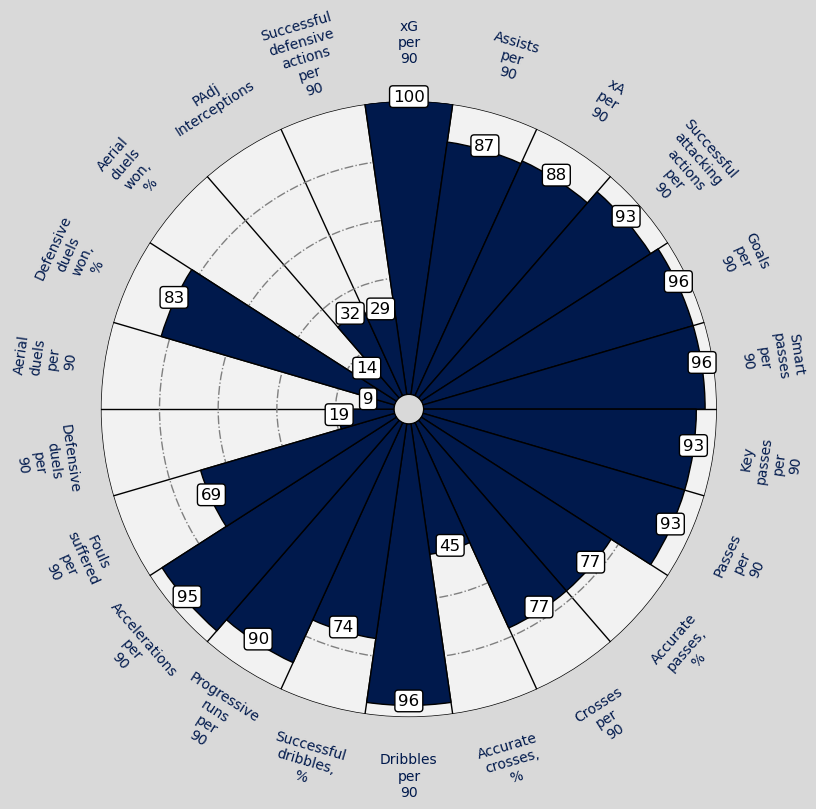

In [106]:
params = [param.replace(" ", "\n") for param in params]    # Align parameter labels

baker = PyPizza(
    params=params,                  # list of parameters
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=1,               # linewidth of last circle
    other_circle_lw=1,              # linewidth for other circles
    other_circle_ls="-."            # linestyle for other circles
)

# plot pizza
fig, ax = baker.make_pizza(
    values,              # list of values
    figsize=(8, 8),      # adjust figsize according to your need
    param_location=120,  # where the parameters will be added
    kwargs_slices=dict(
        facecolor="#00194C", edgecolor="#000000",
        zorder=2, linewidth=1
    ),                   # values to be used when plotting slices
    kwargs_params=dict(
        color="#00194C", fontsize=10,
        va="center", alpha=1.0
    ),                   # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="#FFFFFF",
            boxstyle="round,pad=0.2", lw=1
        )
    )                    # values to be used when adding parameter-values
)
fig.patch.set_facecolor('#D9D9D9') 
plt.savefig('doku_radar.png',dpi=500,bbox_inches = 'tight')